### Terminology 
* predictor variable = independent variable = explanatory variable
* target variable = dependent variable = response variable

### To-Do
* Look into optimization behind LinearRegression call. Does it use OLS or some other method? Mostly care because I'm referring to it as OLS in the train_model function. It also might be good to mention the work done behind the scenes with LinearRegression. Make mention of pros and cons of OLS vs gradient descent for very high-dimensional datasets (>10^4).
* Should we incorporate outlier removal? Maybe later.
* More exercises!!!

### Lesson Outline

1. **Overview of research questions, problem setup**
    - Which variable(s) are most predictive of housing price? Is there some combination of variables (multivariate regression) that predicts housing prices better than individual variables (univariate regression)?
    - What kind of regression model gives us the most accurate housing price prediction (we will test a few)?
    - Which variables significantly relate to housing price?
    - intro idea of predictive vs. interpretive models
    - intro assumptions of univariate models
    
2. **Explore data (review from day 1)**
    * Distribution of target variable and mitigating skew 
    * Correlation across predictor variables

3. **Data formatting/cleaning**
    * One-hot encoding of categorical predictors
    * Remove low variance predictors and predictors containing NaNs
    * Train/test split
    * Zscore all predictors based on training data stats
    * Outlier detection (save for later)
    
4. **Explore univariate models**
    * Which variables are most predictive of housing price by themselves?
    * Interpret results
    * Introduce model assumptions
5. **Explore model with all predictors**
    * Multivariate linear regression assumptions
    * Goals of multivariate regression - predictive vs interpretive
    * Demo overfitting
    * Intro curse of dimensionality
6. **Ridge model**
    * Compare to previous models
    * Interpret model results
7. **Lasso model**
    * Compare to previous models
    * Interpret model results
8. **Elastic net model**
    * Compare to previous models
    * Interpret model results
9. **Revisiting multicolinearity and interpretability**
    * Removing correlated features
    * PCA plus elastic net model
    
**What's missing?**
- More feature engineering to allow for more predictable modeling results
- Model interpretability
    - Biplots to help interpret models
    


### Overview of research questions
- Which variable(s) are most predictive of housing price? Is there some combination of variables (e.g., multivariate regression) that predicts housing prices better than individual variables (e.g., univariate regression)?
- What kind of regression model gives us the most accurate housing price prediction (we will test a few)?

### Load the data

In [1]:
## Ames housing dataset. 

# See here for thorough documentation regarding the feature set: 
# https://www.openml.org/d/42165
from sklearn.datasets import fetch_openml
housing = fetch_openml(name="house_prices", as_frame=True)

### Reminder of basic data properties
1. How many observations and features are there in the data? 
2. What are some of the features available?
3. What is the name of the target feature?

In [2]:
# add blanks between 
print(f"housing['data'].shape = {housing['data'].shape}\n") # 80 features total, 1460 observations
print(f"housing['feature_names'] = {housing['feature_names']}\n")
print(f"housing['target_names'] = {housing['target_names']}\n")

housing['data'].shape = (1460, 80)

housing['feature_names'] = ['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'E

### Data Exploration (Review from yesterday)
* Call plotting functions prepped by Iain

In [3]:
# Extract X and y
X=housing['data']
y=housing['target']


In [4]:
X.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1.0,60.0,RL,65.0,8450.0,Pave,None,Reg,Lvl,AllPub,...,0.0,0.0,None,None,None,0.0,2.0,2008.0,WD,Normal
1,2.0,20.0,RL,80.0,9600.0,Pave,None,Reg,Lvl,AllPub,...,0.0,0.0,None,None,None,0.0,5.0,2007.0,WD,Normal
2,3.0,60.0,RL,68.0,11250.0,Pave,None,IR1,Lvl,AllPub,...,0.0,0.0,None,None,None,0.0,9.0,2008.0,WD,Normal
3,4.0,70.0,RL,60.0,9550.0,Pave,None,IR1,Lvl,AllPub,...,0.0,0.0,None,None,None,0.0,2.0,2006.0,WD,Abnorml
4,5.0,60.0,RL,84.0,14260.0,Pave,None,IR1,Lvl,AllPub,...,0.0,0.0,None,None,None,0.0,12.0,2008.0,WD,Normal


#### Plotting the target variable distribution
Explore the distribution of sale prices. Is the distribution uniform or skewed left/right?

C:\Users\Endemann\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Mean Sale Price: 180921.19589041095
Standard Deviation: 79415.29188606751


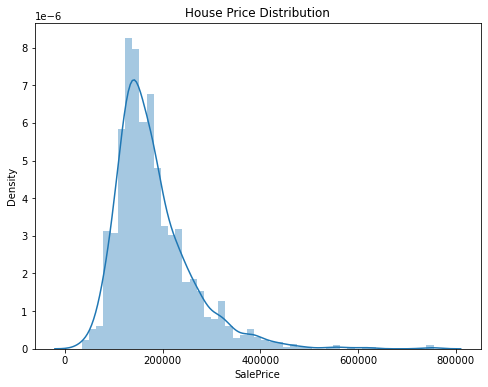

In [5]:
# plot histogram of housing sales, show mean and std of prices as well
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,6))
sns.distplot(y)
title = plt.title('House Price Distribution')
print('Mean Sale Price:', np.mean(y))
print('Standard Deviation:', np.std(y))

#### Skewed Target Variable
This distribution has a long right tail, suggesting that it is skewed. 

Why do we care if the data is skewed? If the response variable is right skewed, the model will be trained on a much larger number of moderately priced homes, and will be less likely to successfully predict the price for the most expensive houses. In addition, the presence of a highly skewed target varible can, more likely, influence the distribution of residuals making them, in turn, non-normal. Normal residuals are required for hypothesis testing.

The concept is the same as training a model on imbalanced categorical classes. If the values of a certain independent variable (feature) are skewed, depending on the model, skewness may violate model assumptions (e.g. logistic regression) or may impair the interpretation of feature importance.

In [6]:
# To quantitatively assess a distribution's skewness, we can use pandas' skew() function
y.skew() 

1.8828757597682129

· If the skewness is between -0.5 and 0.5, the data are fairly symmetrical

· If the skewness is between -1 and — 0.5 or between 0.5 and 1, the data are moderately skewed

· If the skewness is less than -1 or greater than 1, the data are highly skewed

#### Correcting skewed target variable using log transformation
We can correct for a skewed variable by adjusting the scale of the variable. One commonly used rescaling technique that can correct for skew is applying a log transformation. 

12.024050901109373
0.3993150462437029


C:\Users\Endemann\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


0.12133506220520406

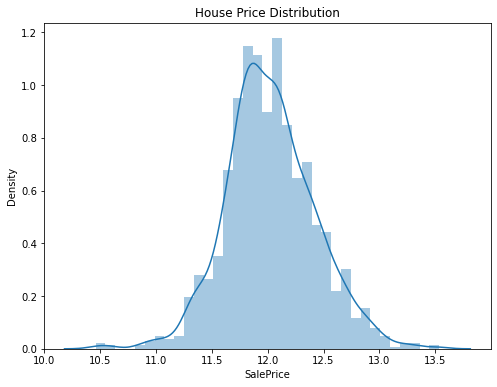

In [7]:
# Correct for skew using log transformation
y = np.log(y)
plt.figure(figsize=(8,6))
sns.distplot(y)
title = plt.title("House Price Distribution")
print(np.mean(y))
print(np.std(y))
y.skew()

Our data now appears to be normal and has a skew value of only .399 — meaning the data is now fairly symmetrical. When we correct the target variable skew using a log transformation but not the predictors, the resulting model fit to this data is a log-linear model, meaning a log dependent variable with linear explanatory variables. 

**Note on other skew correction methods**: While a log transformation is probably the most common way to fix a skewed variable, there are other rescaling methods available to explore, e.g., Box Cox transformation.

#### Skewed Predictor Variables
What happens if our predictor variables are also skewed? Does this have any impact on the model, and should we correct for predictor variable skew?

Technically speaking, the only distributional assumption we have to look out for when doing hypothesis testing with linear models is that the model's residuals are normally distributed. As long as this is true, the underlying independent variable can be as non-normal as you like. However, sometimes the precense of skewed predictors can lead to less stable model predictions because long tails or outliers in the predictor variable distrutions require an analsyis of leverage (i.e. how much these outliers impact on the estimate of the regression coefficients).

Thus, for very skewed variables it might be a good idea to transform the data to eliminate the harmful effects. If there's just a small amount of skew, you likely are fine to move forward with the data as is. We will return to the impact of skewed predictor variables later in the lesson. For now, we will leave all predictor variables as they are.

### Code all nominal and dichotomous variables as "dummy variables" via one-hot encoding

In [8]:
X.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1.0,60.0,RL,65.0,8450.0,Pave,None,Reg,Lvl,AllPub,...,0.0,0.0,None,None,None,0.0,2.0,2008.0,WD,Normal
1,2.0,20.0,RL,80.0,9600.0,Pave,None,Reg,Lvl,AllPub,...,0.0,0.0,None,None,None,0.0,5.0,2007.0,WD,Normal
2,3.0,60.0,RL,68.0,11250.0,Pave,None,IR1,Lvl,AllPub,...,0.0,0.0,None,None,None,0.0,9.0,2008.0,WD,Normal
3,4.0,70.0,RL,60.0,9550.0,Pave,None,IR1,Lvl,AllPub,...,0.0,0.0,None,None,None,0.0,2.0,2006.0,WD,Abnorml
4,5.0,60.0,RL,84.0,14260.0,Pave,None,IR1,Lvl,AllPub,...,0.0,0.0,None,None,None,0.0,12.0,2008.0,WD,Normal


In [9]:
from helper_functions import encode_predictors_housing_data
X_encoded = X.copy(deep=True) 
X_encoded = encode_predictors_housing_data(X_encoded)
X_encoded.head()

,MSSubClass_20.0,MSSubClass_30.0,MSSubClass_40.0,MSSubClass_45.0,MSSubClass_50.0,MSSubClass_60.0,MSSubClass_70.0,MSSubClass_75.0,MSSubClass_80.0,MSSubClass_85.0,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,YrSold,MoSold,Street,CentralAir
0,0,0,0,0,0,1,0,0,0,0,...,0.0,61.0,0.0,0.0,0.0,0.0,2008.0,2.0,1,1
1,1,0,0,0,0,0,0,0,0,0,...,298.0,0.0,0.0,0.0,0.0,0.0,2007.0,5.0,1,1
2,0,0,0,0,0,1,0,0,0,0,...,0.0,42.0,0.0,0.0,0.0,0.0,2008.0,9.0,1,1
3,0,0,0,0,0,0,1,0,0,0,...,0.0,35.0,272.0,0.0,0.0,0.0,2006.0,2.0,1,1
4,0,0,0,0,0,1,0,0,0,0,...,192.0,84.0,0.0,0.0,0.0,0.0,2008.0,12.0,1,1


### Remove columns/predictors that meet any of the following criteria...
* Presence of one or more NaN value (note: interpolation is also an option here)
* Column is a constant or nearly constant (i.e., one value is present across 90% or more of the rows). Constant predictors have no prediction power, and low-variance predictors have very little prediction power.

In [10]:
# Remove variables that have NaNs as observations and vars that have a constant value across all observations
from helper_functions import remove_bad_cols
X_encoded_good = remove_bad_cols(X_encoded, .95)
X_encoded_good.head()


MSSubClass_30.0 removed due to lack of variance ( >95.0% rows have the same value value)
MSSubClass_40.0 removed due to lack of variance ( >95.0% rows have the same value value)
MSSubClass_45.0 removed due to lack of variance ( >95.0% rows have the same value value)
MSSubClass_70.0 removed due to lack of variance ( >95.0% rows have the same value value)
MSSubClass_75.0 removed due to lack of variance ( >95.0% rows have the same value value)
MSSubClass_80.0 removed due to lack of variance ( >95.0% rows have the same value value)
MSSubClass_85.0 removed due to lack of variance ( >95.0% rows have the same value value)
MSSubClass_90.0 removed due to lack of variance ( >95.0% rows have the same value value)
MSSubClass_160.0 removed due to lack of variance ( >95.0% rows have the same value value)
MSSubClass_180.0 removed due to lack of variance ( >95.0% rows have the same value value)
MSSubClass_190.0 removed due to lack of variance ( >95.0% rows have the same value value)
MSZoning_C (all) r

,MSSubClass_20.0,MSSubClass_50.0,MSSubClass_60.0,MSSubClass_120.0,MSZoning_RL,MSZoning_RM,LandContour_Lvl,LotConfig_Corner,LotConfig_CulDSac,LotConfig_Inside,...,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,YrSold,MoSold,CentralAir
0,0,0,1,0,1,0,1,0,0,1,...,0.0,2.0,548.0,0.0,61.0,0.0,0.0,2008.0,2.0,1
1,1,0,0,0,1,0,1,0,0,0,...,1.0,2.0,460.0,298.0,0.0,0.0,0.0,2007.0,5.0,1
2,0,0,1,0,1,0,1,0,0,1,...,1.0,2.0,608.0,0.0,42.0,0.0,0.0,2008.0,9.0,1
3,0,0,0,0,1,0,1,1,0,0,...,1.0,3.0,642.0,0.0,35.0,272.0,0.0,2006.0,2.0,1
4,0,0,1,0,1,0,1,0,0,0,...,1.0,3.0,836.0,192.0,84.0,0.0,0.0,2008.0,12.0,1


**Note**: can replace NaNs with some interpolation instead of dropping columns. Your definition of bad may and possibly should differ!

#### End of data cleaning stage
At this point, we have prepared our X dataframe to contain all independent variables of interest. Our Y variable (pands series object) contains only the response/dependent variable we are trying to predict -- housing prices. 

In [11]:
# quick check of data-types and dimensions post-cleaning efforts
print(X_encoded_good.shape)
print(y.shape)

(1460, 82)
(1460,)


### Split data into train/test sets and zscore
We will now split our data into two separate groupings — one for fitting or training the model ("train set") and another for testing ("test set") the model's ability to generalize to data that was excluded during training. The amount of data you exclude for the test set should be large enough that the model can be vetted against a diverse range of samples. A common rule of thumb is to use 3/4 of the data for training, and 1/3 for testing.

In [12]:
from sklearn.model_selection import train_test_split

# Perform train/test split
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.33, 
                                                    random_state=0)
print(X_train.shape)
print(X_test.shape)

print(type(y_train))
print(type(X_train))



(978, 215)
(482, 215)
<class 'pandas.core.series.Series'>
<class 'pandas.core.frame.DataFrame'>


### Standardize data via z-scoring
Another common pre-processing step used in modeling pipelines is to standardize the scales of all predictor variables. By placing all predictor variables on the same scale, we can safely relate the magnitude of a trained model's coefficients with feature importance (i.e., which feature is most important to the model). Thus, standardization helps with model interpretability rather than with the model's predictive performance.

The most common standardization method is to use "z-scoring". In z-scoring, we scale each observation for a given variable as:

obs = (obs - mean(predictor)) / std(predictor)

This procedure centers each predictor variable at a mean of zero, and allows us to interpret deviations from 0 as the number of standard deviations away from the mean (i.e. a zscore value of 1 means that observation is 1 standard deviation away from the variable's mean). 

In the next section, we will zscore our data using the means and standard deviations derived from the training set data. We will then use these stats to zscore both the training and test sets. It is best to use only the training set to derive the means and standard deviations of the predictor variables such that the test set has no undue influence on the rescaled training data. In this manner, the model will be truly blind to the observations included in the test set — allowing us to accurately assess its ability to generalize when it comes time to test the model.


In [13]:
def zscore_train(train_df):
    train_means = dict()
    train_stds = dict()
    cols = train_df.columns
    stats = dict() # store as dataframe and then print
#     zscore_df = train_df.copy(deep=True)
    for col in cols:
        col_mean = train_df[col].mean()
        train_means[col] = col_mean
        col_std = train_df[col].std()
        print(col, 'mean =', col_mean, 'std =', col_std)
        train_stds[col] = col_std
        train_df.loc[:,col] = (train_df[col] - train_means[col])/train_stds[col]
        
    return train_df, train_means, train_stds

In [14]:
X_train_zscore = X_train.copy(deep=True) # dig into this
X_train_zscore, train_means, train_stds = zscore_train(X_train_zscore)
X_train_zscore.head()



MSSubClass_20.0 mean = 0.37321063394683024 std = 0.4839048336545043
MSSubClass_30.0 mean = 0.044989775051124746 std = 0.20738773435784072
MSSubClass_40.0 mean = 0.003067484662576687 std = 0.05532815980273406
MSSubClass_45.0 mean = 0.009202453987730062 std = 0.09553586364655084
MSSubClass_50.0 mean = 0.09713701431492842 std = 0.2962957657450509
MSSubClass_60.0 mean = 0.20961145194274028 std = 0.4072395681495987
MSSubClass_70.0 mean = 0.04396728016359918 std = 0.2051272340335058
MSSubClass_75.0 mean = 0.009202453987730062 std = 0.09553586364655085
MSSubClass_80.0 mean = 0.034764826175869123 std = 0.18327732874626051
MSSubClass_85.0 mean = 0.013292433537832311 std = 0.11458258705805731
MSSubClass_90.0 mean = 0.03067484662576687 std = 0.17252343113297558
MSSubClass_120.0 mean = 0.06032719836400818 std = 0.23821387416124706
MSSubClass_160.0 mean = 0.046012269938650305 std = 0.20961886711389638
MSSubClass_180.0 mean = 0.003067484662576687 std = 0.05532815980273406
MSSubClass_190.0 mean = 0.0

,MSSubClass_20.0,MSSubClass_30.0,MSSubClass_40.0,MSSubClass_45.0,MSSubClass_50.0,MSSubClass_60.0,MSSubClass_70.0,MSSubClass_75.0,MSSubClass_80.0,MSSubClass_85.0,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,YrSold,MoSold,Street,CentralAir
1127,1.295274,-0.216936,-0.055442,-0.096325,-0.327838,-0.514713,-0.214342,-0.096325,-0.189684,-0.116007,...,0.379257,-0.174902,-0.367189,-0.117585,-0.275025,-0.054775,-0.615835,1.757876,0.071648,0.266685
1424,1.295274,-0.216936,-0.055442,-0.096325,-0.327838,-0.514713,-0.214342,-0.096325,-0.189684,-0.116007,...,1.718829,-0.292921,-0.367189,-0.117585,-0.275025,-0.054775,-0.615835,-0.104345,0.071648,0.266685
587,-0.771248,-0.216936,-0.055442,-0.096325,-0.327838,-0.514713,-0.214342,-0.096325,-0.189684,8.611322,...,-0.742245,-0.705987,-0.367189,-0.117585,-0.275025,-0.054775,0.867630,0.268099,0.071648,0.266685
1157,-0.771248,-0.216936,-0.055442,-0.096325,-0.327838,-0.514713,-0.214342,-0.096325,-0.189684,-0.116007,...,0.597327,0.208660,-0.367189,-0.117585,-0.275025,-0.054775,0.867630,0.268099,0.071648,0.266685
938,-0.771248,-0.216936,-0.055442,-0.096325,-0.327838,1.940844,-0.214342,-0.096325,-0.189684,-0.116007,...,-0.742245,0.621726,-0.367189,-0.117585,-0.275025,-0.054775,-1.357568,0.640543,0.071648,0.266685


In [15]:
# Verify means are (near) zero
X_train_zscore.mean()

MSSubClass_20.0   -2.892483e-16
MSSubClass_30.0    2.224419e-16
MSSubClass_40.0    1.291287e-17
MSSubClass_45.0   -4.869997e-17
MSSubClass_50.0    3.146767e-16
                       ...     
PoolArea          -1.774172e-16
YrSold             3.765155e-14
MoSold             2.538585e-17
Street             3.667823e-16
CentralAir         2.606413e-16
Length: 215, dtype: float64

#### Use means and stds from training data to zscore test data

In [16]:
def zscore_test(test_df, train_means, train_stds):
    cols = test_df.columns
    for col in cols:
        test_df.loc[:,col] = (test_df[col] - train_means[col])/train_stds[col]
        
    return test_df

In [17]:
X_test_zscore = X_test.copy(deep=True) 
X_test_zscore = zscore_test(X_test_zscore, train_means, train_stds)
X_test_zscore.head()

# add plot of distribution before/after

,MSSubClass_20.0,MSSubClass_30.0,MSSubClass_40.0,MSSubClass_45.0,MSSubClass_50.0,MSSubClass_60.0,MSSubClass_70.0,MSSubClass_75.0,MSSubClass_80.0,MSSubClass_85.0,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,YrSold,MoSold,Street,CentralAir
529,1.295274,-0.216936,-0.055442,-0.096325,-0.327838,-0.514713,-0.214342,-0.096325,-0.189684,-0.116007,...,-0.742245,-0.705987,2.735143,-0.117585,-0.275025,-0.054775,-0.615835,-1.221678,0.071648,0.266685
491,-0.771248,-0.216936,-0.055442,-0.096325,3.047168,-0.514713,-0.214342,-0.096325,-0.189684,-0.116007,...,-0.742245,-0.705987,0.129185,-0.117585,-0.275025,-0.054775,-1.357568,0.640543,0.071648,0.266685
459,-0.771248,-0.216936,-0.055442,-0.096325,3.047168,-0.514713,-0.214342,-0.096325,-0.189684,-0.116007,...,-0.742245,-0.705987,3.479702,-0.117585,-0.275025,-0.054775,0.867630,0.268099,0.071648,0.266685
279,-0.771248,-0.216936,-0.055442,-0.096325,-0.327838,1.940844,-0.214342,-0.096325,-0.189684,-0.116007,...,1.500759,1.020040,-0.367189,-0.117585,-0.275025,-0.054775,0.125897,-1.221678,0.071648,0.266685
655,-0.771248,-0.216936,-0.055442,-0.096325,-0.327838,-0.514713,-0.214342,-0.096325,-0.189684,-0.116007,...,-0.742245,-0.705987,-0.367189,-0.117585,-0.275025,-0.054775,1.609362,-1.221678,0.071648,0.266685


#### Should we standardize the target variable as well?
In the context of linear modeling using OLS, standardizing the target varible is not necessary. Standardization of target variables is a common practice used when models make use of gradient descent to solve for the model parameters. Gradient descent tends to converge much faster if the target variable has a smaller range. 


## Train univariate models

Define a function `train_linear_model` to help us fit a linear model to data using a model_type argument to specify which model to use

In [18]:
# TODO: toy example before getting into the functions
reg = LinearRegression().fit(X_train,y_train)

NameError: name 'LinearRegression' is not defined

In [ ]:
# sklearn version
from sklearn.linear_model import LinearRegression

# stats model version (for hypothesis testing)
from statsmodels.formula.api import ols

def train_linear_model(X_train, y_train, model_type):
    if model_type == "unregularized":
        reg = LinearRegression().fit(X_train,y_train)
#         reg = ols("dist ~ speed", data=cars).fit()
    else:
        raise ValueError('Unexpected model_type encountered; model_type = ' + model_type)
  
    # print number of estimated model coefficients. Need to add one to account for y-intercept (not included in reg.coef_ call)
    print('# model coefs = ' + str(len(reg.coef_)+1))

    return reg



Define a function `measure_model_err` to help us measure the model's performance (train/test RMSE)

In [ ]:
from sklearn import metrics

def measure_model_err(X_train, X_test, y_train, y_test, reg):
    
    # 1) get model predicitons based on transformed (z-scored) predictor vars
    y_pred_train=reg.predict(X_train)
    y_pred_test=reg.predict(X_test)
    
    # 2) reverse log transformation (exponential)
    y_pred_train=np.exp(y_pred_train)
    y_pred_test=np.exp(y_pred_test)
    y_train=np.exp(y_train)
    y_test=np.exp(y_test)
    
    # 3) calculate RMSE for train and test sets
    RMSE_train = metrics.mean_squared_error(y_train, y_pred_train,squared=False) # squared=False to get RMSE instead of MSE
    R2_train = reg.score(X_train, y_train) # returns R^2 ("coef of determination")
    RMSE_test = metrics.mean_squared_error(y_test, y_pred_test,squared=False) 
    R2_test = reg.score(X_test, y_test) # returns R^2 ("coef of determination")

    return RMSE_train, RMSE_test, R2_train, R2_test

Define a function `fit_eval_model` that will call both `train_linear_model` and `measure_model_err` and report back on model performance.

In [ ]:
def fit_eval_model(X_train, y_train, X_test, y_test, predictor_vars, model_type):
    '''This function uses the predictor vars specified by predictor_vars to predict housing price. Function returns RMSE for both train and test data'''
    # Convert response vectors from pandas series to numpy arrays. 
    # This is necessary for downstream analyses (required format for linear regression fucntion we'll use).
    y_train=np.array(y_train) 
    y_test=np.array(y_test) 

    # Index specific predictor vars. Use reshape to handle case of just one predictor var (convert to shape=[numRows,numvars] rather than shape=[numRows,] )
    X_train=np.array(X_train[predictor_vars]).reshape(-1, len(predictor_vars)) # index subset of predictor vars
    X_test=np.array(X_test[predictor_vars]).reshape(-1, len(predictor_vars)) # do the same for test set

    # report predictor var if there's only one
    if len(predictor_vars)==1:
        preview_predict_var = ' (' + predictor_vars[0] + ')'
    else:
        preview_predict_var = ''

    # print number of observations in train/test sets as well as number of features used to predict housing price
    print('# of predictor vars = ' + str(len(predictor_vars)) + preview_predict_var)
    print('# of train observations = ' + str(X_train.shape[0]))
    print('# of test observations = ' + str(X_test.shape[0]))
  
    # fit model to training data
    reg = train_linear_model(X_train, y_train, model_type)

    # get train and test set RMSE
    RMSE_train, RMSE_test = measure_model_err(X_train, X_test, y_train, y_test, reg)

    # print results
    print('Train RMSE:', RMSE_train)
    print('Test RMSE:', RMSE_test)
    perc_diff = (RMSE_test-RMSE_train)/RMSE_train
    perc_diff = "{:.0%}".format(perc_diff)
    print('(Test-Train)/Train:', perc_diff)
    return RMSE_train, RMSE_test


#### Determine which single variable is most predictive of housing prices

In [63]:
import pandas as pd 

all_feats=X_train.columns
RMSE_train_list=[None] * len(all_feats)
RMSE_test_list=[None] * len(all_feats)

feat_index=0
for feat in all_feats:  
    # fit univariate model and return train/test RMSE
    RMSE_train, RMSE_test = fit_eval_model(X_train, y_train, 
                                           X_test, y_test,
                                           [feat],'unregularized')
    print('')
    # store model errors
    RMSE_train_list[feat_index] = RMSE_train
    RMSE_test_list[feat_index] = RMSE_test#metrics.mean_squared_error(y_test, predicted_test,squared=False) # squared=False to get RMSE instead of MSE
    feat_index+=1
    
# store errors in pandas dataframe for ease of access downstream
df_model_err = pd.DataFrame()
df_model_err['Predictor Variable'] = all_feats
df_model_err['Train RMSE'] = RMSE_train_list
df_model_err['Test RMSE'] = RMSE_test_list


# of predictor vars = 1 (MSSubClass_20.0)
# of train observations = 978
# of test observations = 482
# model coefs = 2


ValueError: too many values to unpack (expected 2)

### Plot out train/test error vs predictor var

In [33]:
# Let's take a closer look at the results by sorting the test error from best feature to worst. We'll then plot performance by feature for both train and test data.
RMSE_test = np.asarray(df_model_err['Test RMSE'])
sort_inds=[i[0] for i in sorted(enumerate(RMSE_test), key=lambda x:x[1])]
sort_inds = np.array(sort_inds)

# now that we have the sort indices based on test set performance, we'll sort the trainErr, testErr, and feature name vectors
RMSE_train = np.asarray(df_model_err['Train RMSE'])
all_feats = df_model_err['Predictor Variable']

RMSE_train=RMSE_train[sort_inds]
RMSE_test=RMSE_test[sort_inds]
labels=all_feats[sort_inds]

print(labels)
print(len(labels))

57    OverallQual
73     GarageCars
55      YearBuilt
68       FullBath
74     GarageArea
         ...     
58    OverallCond
59     BsmtFinSF1
65      GrLivArea
63       1stFlrSF
62    TotalBsmtSF
Name: Predictor Variable, Length: 82, dtype: object
82


<ipython-input-34-637d614428be>:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels[0:num_feats_plot]);


45534.349409507675
44762.77229823456


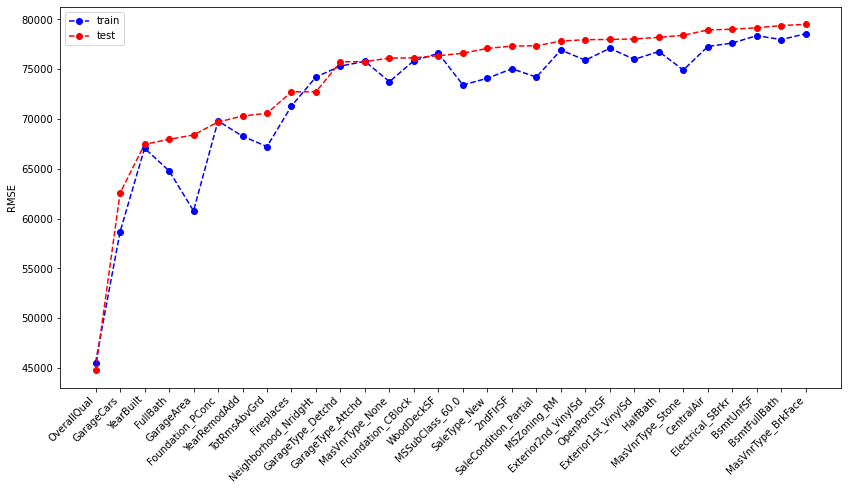

In [34]:
# plot out top 10 features based on RMSE; try tight layout or set fig size 
import matplotlib.pyplot as plt
num_feats_plot=30#len(labels)
fig, ax = plt.subplots()
ax.plot(RMSE_train[0:num_feats_plot], linestyle='--', marker='o', color='b')
ax.plot(RMSE_test[0:num_feats_plot], linestyle='--', marker='o', color='r')
ax.set_xticklabels(labels[0:num_feats_plot]);
plt.xticks(list(range(0,num_feats_plot)),rotation = 45,ha='right'); # Rotates X-Axis Ticks by 45-degrees, ha='right' is used to make rotated labels show up in a clean format
# plt.xticks(list(range(0,num_feats_plot)),rotation = 90); # Rotates X-Axis Ticks by 45-degrees
ax.set_ylabel('RMSE')
ax.legend(['train','test']);
# increase fig size a bit
fig = plt.gcf()
fig.set_size_inches(14, 7) 
# remind ourselves of train/test error for top-performing predictor variable
print(RMSE_train[0])
print(RMSE_test[0])

# add title, colomn chart, maybe start y-axis at zero

### Discuss results


In [ ]:
# print and look at descriptions of top 5 features
best_feats_combined=labels[0:num_feats_plot]
print(best_feats_combined)

# OverallQual: Rates the overall material and finish of the house
# GarageCars: Size of garage in car capacity
# YearBuilt: Original construction date
# FullBath: Full bathrooms above grade (i.e., not in the basement)
# GarageArea: Size of garage in square feet

# Also see here for more thorough documentation regarding the feature set: 
# https://www.openml.org/d/42165

3                OverallQual
12                 GrLivArea
20                GarageCars
9                   1stFlrSF
8                TotalBsmtSF
21                GarageArea
15                  FullBath
1                  YearBuilt
171         Foundation_PConc
18              TotRmsAbvGrd
2               YearRemodAdd
19                Fireplaces
81      Neighborhood_NridgHt
191        GarageType_Detchd
170        Foundation_CBlock
187        GarageType_Attchd
22                WoodDeckSF
5                 BsmtFinSF1
167          MasVnrType_None
39           MSSubClass_60.0
23               OpenPorchSF
202             SaleType_New
53               MSZoning_RM
210    SaleCondition_Partial
10                  2ndFlrSF
80      Neighborhood_NoRidge
146      Exterior1st_VinylSd
162      Exterior2nd_VinylSd
168         MasVnrType_Stone
16                  HalfBath
Name: Predictor Variable, dtype: object


#### Exercise: Discussion of results
**1. How comparable is the train error to the test error for each feature? Do these results indicate overfitting?** 
- For most predictors/features, the test set error is very comparable to train set error. These predictors do not seem to encounter overfitting.

- For a handful of the predictors, we see a very large difference between train set and test set error
Test set error is between .02 to 1.75% larger than train set error. This suggests that we have successfully avoided overfitting.
    
**2. Which feature appears to perform the best in predicting housing prices?** 

OverallQual
    
**3. Write a sentence summarizing how to interpret the test RMSE for the best predictor.** 

On average, the overallQual feature predicts housing prices within +/- $44,762 from the true price 

0.02905866309520297
174.37966498830312


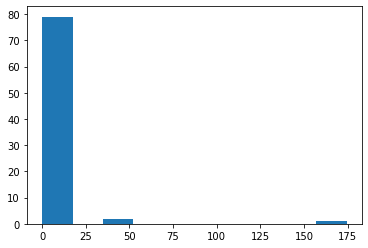

In [45]:
# View data frame and do exercise...
train_test_ratio = (df_model_err['Test RMSE']-df_model_err['Train RMSE'])/df_model_err['Train RMSE']*100
plt.hist(abs(train_test_ratio))
print(abs(train_test_ratio).min())
print(abs(train_test_ratio).max())



## Hypothesis testing of univariate models


#### Hypotheses in linear modeling
* H_0 (Null hypothesis): m = 0 (i.e., slope is flat)
* H_A (Alternative hypothesis): m != 0 (i.e.., slope is not completely flat) 

#### The 4 Assumptions for Linear Regression Hypothesis Testing
1. Linearity: There is a linear relation between Y and X
2. Normality: The error terms (residuals) are normally distributed
3. Homoscedasticity: The variance of the error terms is constant over all X values (homoscedasticity)
    - calculate residuals and show their distribution
    - build an ad hoc plot to test normality using a qq-plot
    - Shapiro-Wilk Test
4. Independence: The error terms are independent



## Fit multivariate model using all predictor vars

#### Predictive Models VS Interpretable Models
* **Interpretable models**: Models trained with linear regression are the most interpretable kind of regression models available - meaning it’s easier to take action from the results of a linear regression model. However, if the assumptions are not satisfied, the interpretation of the results will not always be valid. This can be very dangerous depending on the application.

#### Assumptions of multivariate regression (for statistical/hypothesis testing)
1. Independence: All observations are independent
2. Linearity: The relationship between the dependent variable and the independent variables should be linear

    a. **Note**: In practice, linear models are often used to model nonlinear relationships due to complexity (number of model parameters/coefs that need to be estimated) of nonlinear models. When using a linear model to model nonlinear relationships, it usually best to use resulting model for predictive purposes only. 
3. Normality: For each value of the dependent variable, the distribution of the dependent variable must be normal.
4. Homoscedasticity: The residuals of a good model should be normally and randomly distributed i.e. the unknown does not depend on X ("homoscedasticity")

In [ ]:
print(len(labels)) 

213


In [ ]:
help(fit_eval_model)

Help on function fit_eval_model in module __main__:

fit_eval_model(X_train, y_train, X_test, y_test, predictor_vars, model_type)
    This function uses the predictor vars specified by predictor_vars to predict housing price. Function returns RMSE for both train and test data



In [ ]:
# fit model using all features/predictors available
RMSE_train, RMSE_test = fit_eval_model(X_train, y_train, X_test, y_test, labels, 'unregularized')

# of predictor vars = 213
# of train observations = 978
# of test observations = 482
# model coefs = 214
Train RMSE: 21981.654614715466
Test RMSE: 3562241001.482347
(Test-Train)/Train: 16205418%


### Discuss
Is this a good model? Does this model encounter overfitting?

Flesh this out. How many features, how many observations, how many model coefs

## Regularized regression: ridge, lasso, elastic net


### Ridge and RidgeCV
- Show ridge optimization equation
- Default CV is Leave-One-Out. In this form of CV, all samples in the data except for one are used as the inital training set. The left out sample is used a validation set.
- One alpha value used for entire model; larger alphas give more weight to the penalty/regularization term of the loss function

Edit function below to use multiple regression techniques (add model_type input)





In [ ]:
# edit train_linear_model to train ridge models as well
def train_linear_model(X_train, y_train, model_type):
  if model_type == "unregularized":
    reg = LinearRegression().fit(X_train,y_train)
  elif model_type == 'ridge':
    reg = RidgeCV(alphas=[1e-3,1e-2,1e-1,1,10,100,1000], store_cv_values=True).fit(X_train,y_train)
    print(reg.cv_values_.shape) # num_datapoints x num_alphas
    print(np.mean(reg.cv_values_, axis=0))
    print(reg.alpha_)
  else:
    raise ValueError('Unexpected model_type encountered; model_type = ' + model_type)

  # print number of estimated model coefficients. Need to add one to account for y-intercept (not included in reg.coef_ call)
  print('# model coefs = ' + str(len(reg.coef_)+1))

  return reg



In [ ]:
# import sklearn's ridge model with built-in cross-validation
from sklearn.linear_model import RidgeCV 

# fit model using multivariate_model_feats and ridge regression
RMSE_train, RMSE_test = fit_eval_model(X_train, y_train, X_test, y_test, labels, 'ridge')

# of predictor vars = 213
# of train observations = 978
# of test observations = 482
(978, 7)
[1.01586692e+09 1.01401918e+09 9.99400573e+08 9.57029390e+08
 9.43452552e+08 1.02279420e+09 1.21826389e+09]
10.0
# model coefs = 214
Train RMSE: 25463.82775189401
Test RMSE: 39003.787373887266
(Test-Train)/Train: 53%


- What is the model's train and test error? How does this compare to the unregularized model we fit using all predictor variables? How does this model compare to the best univariate model we fit?
  - The ridge model does much better (i.e., in terms of Test RMSE) than the unregularized model that uses all predictor vars.
  - Unregularized_all_predictors_testRMSE: 3562241001
  - Unregularized_best_univariate_testRMSE: 48243
  - Regularized_all_predictors_testRMSE: 39004

- What alpha value was selected using RidgeCV? Is it a lower or higher value? What does this value tell you about the model?
  - This model is highly regularized/penalized since it has a large alpha value



### LASSO
- explain why there's a random state param in LASSO but not ridge


In [ ]:
# edit train_linear_model to train ridge models as well
def train_linear_model(X_train, y_train, model_type):
  if model_type == "unregularized":
    reg = LinearRegression().fit(X_train,y_train)
  elif model_type == 'ridge':
    reg = RidgeCV(alphas=[1e-3,1e-2,1e-1,1,10,100,1000], store_cv_values=True).fit(X_train,y_train)
    print(reg.cv_values_.shape) # num_datapoints x num_alphas
    print(np.mean(reg.cv_values_, axis=0))
    print(reg.alpha_)
  elif model_type == 'lasso':
    reg = LassoCV(random_state=0, alphas=[1e-3,1e-2,1e-1,1,10,100,1000], max_iter=100000, tol=1e-3).fit(X_train,y_train)
    print(reg.alpha_)
    print(reg.alphas_)

  else:
    raise ValueError('Unexpected model_type encountered; model_type = ' + model_type)

  # print number of estimated model coefficients. Need to add one to account for y-intercept (not included in reg.coef_ call)
  print('# model coefs = ' + str(len(reg.coef_)+1))

  return reg



In [ ]:
# import sklearn's lasso model with built-in cross-validation
from sklearn.linear_model import LassoCV 

# fit model using multivariate_model_feats and ridge regression
RMSE_train, RMSE_test = fit_eval_model(X_train, y_train, X_test, y_test, labels, 'lasso')

# of predictor vars = 213
# of train observations = 978
# of test observations = 482


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8284193614.777222, tolerance: 4900223000.335935
  positive,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 39790829366.316284, tolerance: 4900223000.335935
  positive,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 38718390339.6676, tolerance: 4900223000.335935
  positive,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 38647786272.

100.0
[1.e+03 1.e+02 1.e+01 1.e+00 1.e-01 1.e-02 1.e-03]
# model coefs = 214
Train RMSE: 23844.411315377245
Test RMSE: 41216.23320716389
(Test-Train)/Train: 73%


Add elastic net option to function

In [ ]:
# edit train_linear_model to train ridge models as well
def train_linear_model(X_train, y_train, model_type):
  if model_type == "unregularized":
    reg = LinearRegression().fit(X_train,y_train)
  elif model_type == 'ridge':
    reg = RidgeCV(alphas=[1e-3,1e-2,1e-1,1,10,100,1000], store_cv_values=True).fit(X_train,y_train)
    print(reg.cv_values_.shape) # num_datapoints x num_alphas
    print(np.mean(reg.cv_values_, axis=0))
    print('alpha:', reg.alpha_)
  elif model_type == 'lasso':
    reg = LassoCV(random_state=0, alphas=[1e-3,1e-2,1e-1,1,10,100,1000], max_iter=100000, tol=1e-3).fit(X_train,y_train)
    print('alpha:', reg.alpha_)
    print('alphas:', reg.alphas_)
  elif model_type == 'elastic':
    reg = ElasticNetCV(l1_ratio=[.1, .5, .7, .9, .95, .99, 1],alphas=[1e-5,1e-4,1e-3,1e-2,1e-1,1,10]).fit(X_train,y_train)
    print('alpha:', reg.alpha_)
    print('l1_ratio:', reg.l1_ratio_)
  else:
    raise ValueError('Unexpected model_type encountered; model_type = ' + model_type)

  # print number of estimated model coefficients. Need to add one to account for y-intercept (not included in reg.coef_ call)
  print('# model coefs = ' + str(len(reg.coef_)+1))

  return reg



In [ ]:
from sklearn.linear_model import ElasticNetCV

# fit model using multivariate_model_feats and ridge regression
RMSE_train, RMSE_test = fit_eval_model(X_train, y_train, X_test, y_test, labels, 'elastic')

# of predictor vars = 213
# of train observations = 978
# of test observations = 482


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 466501538000.58923, tolerance: 490022300.0335935
  positive,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 403270137725.9388, tolerance: 490022300.0335935
  positive,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 301577300752.58386, tolerance: 490022300.0335935
  positive,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2300816936

0.1
0.95
# model coefs = 214
Train RMSE: 24561.74964572943
Test RMSE: 39333.83728843832
(Test-Train)/Train: 60%


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.409e+11, tolerance: 6.087e+08
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


In [ ]:
# Diabetes dataset

# from sklearn import datasets
# example datasets from sklean: https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_diabetes.html#sklearn.datasets.load_diabetes
# iris_X, iris_y = datasets.load_iris(return_X_y=True)
# more info on diabetes dataset: https://scikit-learn.org/stable/datasets/toy_dataset.html#diabetes-dataset
# diabetes = datasets.load_diabetes(return_X_y=False,as_frame=False)
# print(type(diabetes))
# feat_names=diabetes['feature_names']
# print(feat_names)
# data=diabetes['data']
# target=diabetes['target'] # the target is a quantitative measure of disease progression one year after baseline
# print(data.shape)
# print(target.shape)
# print(diabetes_X.shape) # 442 observations, 10 features
# diabetes_y

# California housing dataset

# from sklearn.datasets import fetch_california_housing
# housing = fetch_california_housing()
# # housing
# feat_names=housing['feature_names']
# print(feat_names)
# print(len(feat_names))